In [1]:
import random
import re
from typing import Tuple, Iterable, List
from dataclasses import dataclass, field
import numpy as np
import pandas as pd
import glob
import math
import time
from timeit import default_timer as timer
import gc
import sys
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'
os.environ['TOKENIZERS_PARALLELISM'] = 'false'
# os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:512'
os.environ['KAGGLE_KERNEL_RUN_TYPE'] = 'Interactive'
# IS_INTERACTIVE = os.environ['KAGGLE_KERNEL_RUN_TYPE'] == 'Interactive'

print('CUDA_VISIBLE_DEVICES' in os.environ.keys())
CUDA_VISIBLE_DEVICES = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = CUDA_VISIBLE_DEVICES
print('CUDA_VISIBLE_DEVICES' in os.environ.keys())
cwd = os.getcwd()
print(cwd)
os.chdir('/kaggle/working')
cwd = os.getcwd()
print(cwd)
ROOT_DIR = cwd

import json
import sklearn

import scipy
import torch 
import torch.nn as nn
from torch.nn import Transformer, CrossEntropyLoss, BCEWithLogitsLoss 
import torch.nn.functional as F
from torch.nn.functional import one_hot
import torch.optim as optim
from torch import Tensor
!pip install torchsummary
import torchsummary
print(torch.cuda.is_available())
print(torch.__version__)
print(sys.version)

import io
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import vocab, Vocab, build_vocab_from_iterator
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from collections import Counter, OrderedDict
from torchtext.utils import download_from_url, extract_archive
from torch.utils.tensorboard import SummaryWriter
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Normalize, Lambda 
!pip install pytorchvideo
import pytorchvideo
import pytorchvideo.transforms as VT
# from pytorchvideo.transforms import Normalize 
from torchmetrics.text import ExtendedEditDistance
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 24
import seaborn as sn

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GroupShuffleSplit, ShuffleSplit, KFold
import cv2

import ignite
from ignite.metrics import TopKCategoricalAccuracy
from ignite.metrics.metric import Metric

!pip install tensorrt
import tensorrt as trt
!pip install onnx
import onnx
from onnx import backend



False
True
/kaggle/working
/kaggle/working


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


True
2.0.0
3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pytorchvideo: filename=pytorchvideo-0.1.5-py3-none-any.whl size=188715 sha256=6ced8f63abe66bdc8113b8e84fc2404ec32c4a0aaa0233febc70940ccccbc0dc
  Stored in directory: /root/.cache/pip/wheels/ff/4e/81/0f72a543be9ed7eb737c95bfc5da4025e73226b44368074ece
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=d2d963554e3518d5363c4d22482b963d72cd6a8ebf2d86e0e2acc9206ba66c2d
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f736248

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


  Preparing metadata (setup.py) ... - \ done
  Created wheel for tensorrt: filename=tensorrt-8.6.1.post1-py2.py3-none-any.whl size=17300 sha256=306552995863558e8d1d1e41f9da81e239482d202cf05973b2a95b587482540d
  Stored in directory: /root/.cache/pip/wheels/f4/c8/0e/b79b08e45752491b9acfdbd69e8a609e8b2ed7640dda5a3e59
Successfully built tensorrt


In [2]:
# Param setting
# class Params:
#
#     # If true, process data from scratch
#     # If false, load preprocessed data
#     PREPROCESS_DATA = True
#
#
#     USE_VAL = True
#
#     IS_DEPTH = True # If True, consider the z dimension
#     N_DIMS = 3 if IS_DEPTH else 2
#     N_LANDMARKS = 543
#     SEED = 42
#
#     # TODO: KAGGLE
#     # IS_INTERACTIVE = os.environ['KAGGLE_KERNEL_RUN_TYPE'] \
#     # == 'Interactive'
#     # VERBOSE = 1 if IS_INTERACTIVE else 2
#
#     IS_INTERACTIVE = True
#     VERBOSE = 1 if IS_INTERACTIVE else 2
#     print('CUDA_VISIBLE_DEVICES' in os.environ.keys())
#     CUDA_VISIBLE_DEVICES = '0'
#     os.environ['CUDA_VISIBLE_DEVICES'] = CUDA_VISIBLE_DEVICES
#     print('CUDA_VISIBLE_DEVICES' in os.environ.keys())
#     os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
#     IS_CORRECT = True # If True, correct the right hand
#     IS_CORRECT_FRAME = True # If True, correct the frame_idx
#
#     INPUT_SIZE = 64 # Input video frames
#     BATCH_SIZE = 32
#     N_EPOCHS = 100
#
#     IS_RESIDUAL = True
#     IS_EMBEDDING = True
#     IS_TORCH_EM = True
#     IS_TORCH_EN = True
#
#     device = torch.device('cpu')
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#
#     MIN_FREQ = 0
#     SPECIALS = ['', '<unk>', '<pad>', '<bos>', '<eos>']
#     SPECIAL_FIRST = True
#
# params = Params()
# print(params.SPECIAL_FIRST)


IS_INTERACTIVE = False
# If true, process data from scratch
# If false, load preprocessed data
PREPROCESS_DATA = False



USE_VAL = True

IS_DEPTH = False # If True, consider the z dimension
N_DIMS = 3 if IS_DEPTH else 2
# N_LANDMARKS = 543
SEED = 42


IS_CORRECT = True # If True, correct the right hand
IS_CORRECT_FRAME = True # If True, correct the frame_idx

INPUT_SIZE = 32 # Input video frames
BATCH_SIZE = 128
N_EPOCHS = 50
N_WARM = 5 # int(0.1 * N_EPOCHS)
LR_MAX = 1e-5


IS_RESIDUAL = True
IS_EMBEDDING = True
IS_TORCH_EM = True
IS_TORCH_EN = True


device = torch.device('cpu')
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
TOKENIZER = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')
WEIGHT = bert.bert.embeddings.word_embeddings.weight
with torch.no_grad():
    WEIGHT[0].fill_(0)
bert_in_dim = WEIGHT.shape[0]
bert_out_dim = WEIGHT.shape[1]
print(WEIGHT)
# MIN_FREQ = 0
# UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX, BLANK_IDX = 0, 1, 2, 3, 4
# SPECIALS = ['<unk>', '<pad>', '<bos>', '<eos>', '', torch.nan]
# SPECIAL_FIRST = True
 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0015, -0.0821, -0.0160,  ..., -0.0081, -0.0475,  0.0753]],
       requires_grad=True)


In [3]:
# View the training landmark from parquet to df
pq = pd.read_parquet('/kaggle/input/asl-fingerspelling/train_landmarks/5414471.parquet', \
                     engine='pyarrow')
#print(pq.head(5))
print(pq.info)
#print(len(pq.columns.values.tolist()))
#print(pq.columns.values.tolist())
print(pq.values.shape)


<bound method DataFrame.info of              frame  x_face_0  x_face_1  x_face_2  x_face_3  x_face_4  \
sequence_id                                                            
1816796431       0  0.710588  0.699951  0.705657  0.691768  0.699669   
1816796431       1  0.709525  0.697582  0.703713  0.691016  0.697576   
1816796431       2  0.711059  0.700858  0.706272  0.693285  0.700825   
1816796431       3  0.712799  0.702518  0.707840  0.694899  0.702445   
1816796431       4  0.712349  0.705451  0.709918  0.696006  0.705180   
...            ...       ...       ...       ...       ...       ...   
1848182207     296  0.657136  0.635888  0.643259  0.619031  0.633084   
1848182207     297  0.655706  0.635570  0.642730  0.618637  0.632830   
1848182207     298  0.653681  0.636057  0.643054  0.618643  0.633258   
1848182207     299  0.654293  0.635543  0.642558  0.617969  0.632699   
1848182207     300  0.655109  0.634491  0.641743  0.617779  0.631771   

             x_face_5  x_face_6

In [4]:
USE_TYPES = ['face', 'left_hand', 'right_hand', 'pose']

FACE_ID = np.array([
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 146, 91, 181, 84, 17, 314, 405, 321, 375,
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    95, 88, 178, 87, 14, 317, 402, 318, 324, 308,
])
LEFT_HAND_ID = np.arange(21)
RIGHT_HAND_ID = np.arange(21)
POSE_ID = np.arange(33)

FACE = ['x_face_{}'.format(i) for i in FACE_ID] + \
['y_face_{}'.format(i) for i in FACE_ID] + \
['z_face_{}'.format(i) for i in FACE_ID]
LEFT_HAND = ['x_left_hand_{}'.format(i) for i in LEFT_HAND_ID] + \
['y_left_hand_{}'.format(i) for i in LEFT_HAND_ID] + \
['z_left_hand_{}'.format(i) for i in LEFT_HAND_ID]
RIGHT_HAND = ['x_right_hand_{}'.format(i) for i in RIGHT_HAND_ID] + \
['y_right_hand_{}'.format(i) for i in RIGHT_HAND_ID] + \
['z_right_hand_{}'.format(i) for i in RIGHT_HAND_ID]
POSE = ['x_pose_{}'.format(i) for i in POSE_ID] + \
['y_pose_{}'.format(i) for i in POSE_ID] + \
['z_pose_{}'.format(i) for i in POSE_ID]

FACE_NOT_Z = ['x_face_{}'.format(i) for i in FACE_ID] + \
['y_face_{}'.format(i) for i in FACE_ID]
LEFT_HAND_NOT_Z = ['x_left_hand_{}'.format(i) for i in LEFT_HAND_ID] + \
['y_left_hand_{}'.format(i) for i in LEFT_HAND_ID]
RIGHT_HAND_NOT_Z = ['x_right_hand_{}'.format(i) for i in RIGHT_HAND_ID] + \
['y_right_hand_{}'.format(i) for i in RIGHT_HAND_ID]
POSE_NOT_Z = ['x_pose_{}'.format(i) for i in POSE_ID] + \
['y_pose_{}'.format(i) for i in POSE_ID]

if IS_DEPTH:
    P = FACE + LEFT_HAND + RIGHT_HAND + POSE
else:
    P = FACE_NOT_Z + LEFT_HAND_NOT_Z + RIGHT_HAND_NOT_Z + POSE_NOT_Z

N_SELECTED = int(len(P) / N_DIMS)
print('N_SELECTED: {}'.format(N_SELECTED))

FACE_IDX = np.arange(0, 40)
LEFT_HAND_IDX = np.arange(40, 61)
RIGHT_HAND_IDX = np.arange(61, 82)
POSE_IDX = np.arange(82, 115)
LEFT_IDX = np.concatenate([FACE_IDX, LEFT_HAND_IDX, POSE_IDX])
RIGHT_IDX = np.concatenate([FACE_IDX, RIGHT_HAND_IDX, POSE_IDX])
N_COLS = len(LEFT_IDX)
print('FACE_IDX: {}'.format(FACE_IDX))
print('LEFT_HAND_IDX: {}'.format(LEFT_HAND_IDX))
print('RIGHT_HAND_IDX: {}'.format(RIGHT_HAND_IDX))
print('POSE_IDX: {}'.format(POSE_IDX))
print('LEFT_IDX: {}'.format(LEFT_IDX))
print('RIGHT_IDX: {}'.format(RIGHT_IDX))


N_SELECTED: 115
FACE_IDX: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
LEFT_HAND_IDX: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
RIGHT_HAND_IDX: [61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
POSE_IDX: [ 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114]
LEFT_IDX: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114]
RIGHT_IDX: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34

In [5]:
# Load the training landmark with selected columns
# for each sequence per parquet_file
# def load_relevant_data_subset(pq_path):
#     selected_columns = P
#     data0 = pd.read_parquet(pq_path,
#                             columns=['frame']+selected_columns)
#     #print(data0)
#     indexes = data0.index
#     #print(indexes)
#     indexes_ = np.unique(indexes.values)
#
#     data0 = data0.sort_index().values
#     data = data0[:, 1:]
#     frames_idx = data0[:, 0:1]
#     data = data.reshape([-1, N_DIMS, N_SELECTED]).\
#     transpose(0, 2, 1)
#     #print(data)
#     repeats = N_SELECTED
#     frames_idx = np.repeat(frames_idx.reshape([-1, 1, 1]),
#                            repeats=repeats,
#                            axis=1)
#     #print(data.shape)
#     #print(frames_idx.shape)
#     #print(frames_idx)
#     data_frames_idx = np.concatenate([frames_idx, data],
#                                      axis=-1)#.astype(np.int64)
#     #print(data_frames_idx.shape)
#     #print(data_frames_idx)
#
#     # Slice each parquet_file according to sequence_id
#     sequence_list = []
#     sequence_idx_dict = {'sequence_idx': [], 'sequence': []}
#     length_list = []
#     for i in indexes_:
#         mask = indexes.get_loc(i)
#         if not isinstance(mask, slice):
#             mask = slice(mask, mask+1)
#         start = mask.__getattribute__('start')
#         stop = mask.__getattribute__('stop')
#         length = stop - start
#         sequence = data_frames_idx[mask]
#         length_list.append(length)
#         sequence_list.append(sequence)
#         sequence_idx_dict['sequence_idx'].append(i)
#         sequence_idx_dict['sequence'].append(sequence)
#
#     return max(length_list), sequence_list, sequence_idx_dict

def load_relevant_data_subset(pq_path, indexes_):
    selected_columns = P
    data0 = pd.read_parquet(pq_path,
                            columns=['frame']+selected_columns)
    #print(data0)
    indexes = data0.index
    #print(indexes)
    indexes_ = np.unique(indexes_)
    #print(len(indexes_))

    data0 = data0.sort_index().values
    data = data0[:, 1:]
    frames_idx = data0[:, 0:1]
    data = data.reshape([-1, N_DIMS, N_SELECTED]).\
    transpose(0, 2, 1)
    #print(data)
    repeats = N_SELECTED
    frames_idx = np.repeat(frames_idx.reshape([-1, 1, 1]),
                           repeats=repeats,
                           axis=1)
    #print(data.shape)
    #print(frames_idx.shape)
    #print(frames_idx)
    data_frames_idx = np.concatenate([frames_idx, data],
                                     axis=-1)#.astype(np.int64)
    #print(data_frames_idx.shape)
    #print(data_frames_idx)

    # Slice each parquet_file according to sequence_id
    sequence_list = []
    sequence_idx_dict = {'sequence_idx': [], 'sequence': []}
    length_list = []
    for i in indexes_:
        mask = indexes.get_loc(i)
        if not isinstance(mask, slice):
            mask = slice(mask, mask+1)
        start = mask.__getattribute__('start')
        stop = mask.__getattribute__('stop')
        length = stop - start
        sequence = data_frames_idx[mask]
        length_list.append(length)
        sequence_list.append(sequence)
        sequence_idx_dict['sequence_idx'].append(i)
        sequence_idx_dict['sequence'].append(sequence)

    return max(length_list), sequence_list, sequence_idx_dict

In [6]:
class PREPROCESS_LAYER(nn.Module):
    def __init__(self, is_correct, is_correct_frame, device):
        super(PREPROCESS_LAYER, self).__init__()
        self.is_correct = is_correct
        self.is_correct_frame = is_correct_frame
        self.device = device
        if self.is_correct:
            if IS_DEPTH:
                correction = torch.tensor([
                    [0] * len(FACE_IDX) \
                    + [0.5] * len(LEFT_HAND_IDX) \
                    + [0.5] * len(POSE_IDX),
                    [0] * len(LEFT_IDX),
                    [0] * len(LEFT_IDX)],
                    #dtype=torch.int64,
                    requires_grad=False
                ).to(self.device)
            else:
                correction = torch.tensor([
                    [0] * len(FACE_IDX) \
                    + [0.5] * len(LEFT_HAND_IDX) \
                    + [0.5] * len(POSE_IDX),
                    [0] * len(LEFT_IDX)],
                    #dtype=torch.int64,
                    requires_grad=False
                ).to(self.device)
            self.correction = torch.transpose(correction, 1, 0)

            self.FACE_IDX = torch.from_numpy(FACE_IDX)\
                .type(torch.int64).to(self.device)
            self.LEFT_HAND_IDX = torch.from_numpy(LEFT_HAND_IDX)\
                .type(torch.int64).to(self.device)
            self.RIGHT_HAND_IDX = torch.from_numpy(RIGHT_HAND_IDX)\
                .type(torch.int64).to(self.device)
            self.POSE_IDX = torch.from_numpy(POSE_IDX)\
                .type(torch.int64).to(self.device)
            self.LEFT_IDX = torch.from_numpy(LEFT_IDX)\
                .type(torch.int64).to(self.device)
            self.RIGHT_IDX = torch.from_numpy(RIGHT_IDX)\
                .type(torch.int64).to(self.device)
            self.INPUT_SIZE = torch.tensor(INPUT_SIZE)\
                .type(torch.int64).to(self.device)

    def pad_edge_data(self, t, repeats, side):
        if side == 'LEFT':
            return torch.cat([t[:1].repeat(repeats, 1, 1), t], dim=0)
        elif side == 'RIGHT':
            return torch.cat([t, t[-1:].repeat(repeats, 1, 1)], dim=0)

    def pad_edge_frames(self, t, repeats, side):
        if side == 'LEFT':
            return torch.cat([t[:1].repeat(repeats), t])
        elif side == 'RIGHT':
            return torch.cat([t, t[-1:].repeat(repeats)])

    def forward(self, data0):
        """
        Args:
            data0: [N_FRAMES0, N_SELECTED, N_DIMS+1]

        Returns:
            data: [INPUT_SIZE, N_COLS, N_DIMS+1]
            non_nan_frames_idx: [INPUT_SIZE]

        """
        data0 = torch.from_numpy(data0).to(self.device)
        N_FRAMES0 = data0.shape[0]
        N_FRAMES0 = min(N_FRAMES0, self.INPUT_SIZE ** 2)
        data0 = data0[:N_FRAMES0, :, :]

        # Find out which hand is dominant
        left_hand_sum = torch.sum(torch.where(torch.isnan(
            torch.gather(
                input=data0[:, :, 1:],
                index=self.LEFT_HAND_IDX[None, :, None].\
                    expand([data0[:, :, 1:].shape[0], -1, N_DIMS]),
                dim=1)), 0, 1))
        right_hand_sum = torch.sum(torch.where(torch.isnan(
            torch.gather(
                input=data0[:, :, 1:],
                index=self.RIGHT_HAND_IDX[None, :, None].\
                    expand([data0[:, :, 1:].shape[0], -1, N_DIMS]),
                dim=1)), 0, 1))
        left_dominant = left_hand_sum >= right_hand_sum

        # Calculate the number of non_nan values per frame
        # for the dominant hand
        if left_dominant:
            non_nan_sum_per_frame = torch.sum(torch.where(torch.isnan(
                torch.gather(
                input=data0[:, :, 1:],
                index=self.LEFT_HAND_IDX[None, :, None].\
                    expand([data0[:, :, 1:].shape[0], -1, N_DIMS]),
                dim=1)), 0, 1), dim=[1, 2])
        else:
            non_nan_sum_per_frame = torch.sum(torch.where(torch.isnan(
                torch.gather(
                input=data0[:, :, 1:],
                index=self.RIGHT_HAND_IDX[None, :, None].\
                    expand([data0[:, :, 1:].shape[0], -1, N_DIMS]),
                dim=1)), 0, 1), dim=[1, 2])

        # Find out non_nan_frames_idx for the dominant hand
        non_nan_frames_idx = torch.where(non_nan_sum_per_frame>0)
        if torch.all(non_nan_sum_per_frame>0):
            pass
        else:
            print('Nan frame indexes: {}'.format(
                torch.where(non_nan_sum_per_frame==0)))

        data0 = data0[non_nan_frames_idx]
        N_FRAMES = data0.shape[0]
        non_nan_frames_idx = non_nan_frames_idx[0]
        if self.is_correct_frame:
            #print('Correct frame indexes')
            non_nan_frames_idx -= min(torch.clone(non_nan_frames_idx))
        assert len(non_nan_frames_idx) == N_FRAMES

        # Gather dominant data
        if left_dominant:
            data = torch.gather(
                input=data0,
                index=self.LEFT_IDX[None, :, None].\
                    expand([data0.shape[0], -1, N_DIMS+1]),
                dim=1
            )
        else:
            data = torch.gather(
                input=data0,
                index=self.RIGHT_IDX[None, :, None].\
                    expand([data0.shape[0], -1, N_DIMS+1]),
                dim=1
            )
            if self.is_correct:
                data_0 = data[:, :, :1]
                data_1 = data[:, :, 1:]
                data_1 = self.correction + \
                    (data_1 - self.correction) * torch.where(\
                    self.correction!=0, -1, 1)
                data = torch.cat([data_0, data_1], dim=-1)

        # Pad the number of non_nan frames,
        # s.t. the maximum is INPUT_SIZE
        if N_FRAMES <= self.INPUT_SIZE**1:
            #print('*****Shallow preprocess*****')
            non_nan_frames_idx = F.pad(
                input=non_nan_frames_idx,
                pad=(0, self.INPUT_SIZE-N_FRAMES),
                mode='constant',
                value=0
            ).type(torch.int32)
            # Pad data by 0
            data = F.pad(
                input=data,
                pad=(0, 0, 0, 0, 0, self.INPUT_SIZE-N_FRAMES),
                mode='constant',
                value=0
            )
            # Fill nan values by 0
            data = torch.where(torch.isnan(data), 0.0, data.type(torch.float64))
            data = data.type(torch.float32).detach().cpu().numpy()
            non_nan_frames_idx_values = non_nan_frames_idx.\
                detach().cpu().numpy()
            non_nan_frames_idx_indices = None
            return data, non_nan_frames_idx_values, \
                   non_nan_frames_idx_indices
        else:
            #print('*****Deep preprocess*****')
            if N_FRAMES <= self.INPUT_SIZE**2:
                repeats = torch.div(self.INPUT_SIZE**2, N_FRAMES, \
                                    rounding_mode='trunc')
                data = data.repeat(repeats, 1, 1)
                non_nan_frames_idx = non_nan_frames_idx.repeat(repeats)

            pool_size = torch.div(len(data), self.INPUT_SIZE, \
                                  rounding_mode='trunc')
            if torch.remainder(len(data), self.INPUT_SIZE) > 0:
                pool_size += 1

            if pool_size == 1:
                pad_size = (pool_size * self.INPUT_SIZE) - len(data)
            else:
                pad_size = (pool_size * self.INPUT_SIZE) % len(data)

            pad_left =  torch.div(pad_size, 2, rounding_mode='trunc') + \
                torch.div(self.INPUT_SIZE, 2, rounding_mode='trunc')
            pad_right =  torch.div(pad_size, 2, rounding_mode='trunc') + \
                torch.div(self.INPUT_SIZE, 2, rounding_mode='trunc')
            if torch.remainder(pad_size, 2) > 0:
                pad_right += 1

            data = self.pad_edge_data(data, pad_left, 'LEFT')
            data = self.pad_edge_data(data, pad_right, 'RIGHT')
            non_nan_frames_idx = self.pad_edge_frames(non_nan_frames_idx, \
                                                  pad_left, 'LEFT')
            non_nan_frames_idx = self.pad_edge_frames(non_nan_frames_idx, \
                                                  pad_right, 'RIGHT')

            # Mean pool
            data = torch.reshape(data, \
                                 [self.INPUT_SIZE, -1, N_COLS, N_DIMS+1])#.type(torch.float64)
            non_nan_frames_idx = torch.reshape(non_nan_frames_idx, \
                                               [self.INPUT_SIZE, -1])#.type(torch.float64)
            data = torch.nanmean(data, dim=1)
            non_nan_frames_idx = torch.nanmean(non_nan_frames_idx.type(torch.float32), dim=1).type(torch.int32)

            # Fill nan values by 0
            # data = torch.where(torch.isnan(data), 0, data.type(torch.int64))
            data = torch.where(torch.isnan(data), 0.0, data.type(torch.float64))
            non_nan_frames_idx_values = non_nan_frames_idx.sort().values
            non_nan_frames_idx_indices = non_nan_frames_idx.sort().indices

            data = data.type(torch.float32).detach().cpu().numpy()
            non_nan_frames_idx_values = non_nan_frames_idx_values.\
                detach().cpu().numpy()
            non_nan_frames_idx_indices = non_nan_frames_idx_indices.\
                detach().cpu().numpy()
            data = np.take(data, non_nan_frames_idx_indices, axis=0)

            return data, non_nan_frames_idx_values, \
                   non_nan_frames_idx_indices

preprocess_layer = PREPROCESS_LAYER(is_correct=IS_CORRECT, \
                                    is_correct_frame=IS_CORRECT_FRAME, \
                                    device=device)
preprocess_layer


PREPROCESS_LAYER()

In [7]:
# Read training data
train = pd.read_csv('/kaggle/input/asl-fingerspelling/train.csv')
# print(train.info)
N_SAMPLES = len(train)
print('Origninal training N_SAMPLES: {}'.format(N_SAMPLES))

if not (IS_INTERACTIVE or PREPROCESS_DATA):
    train = train.sample(int(1e4), random_state=SEED)
else:
    train = train

N_SAMPLES = len(train)
print('Real training N_SAMPLES: {}'.format(N_SAMPLES))
print(len(np.unique(train['path'].values)))
print(len(np.unique(train['file_id'].values)))
print(len(np.unique(train['sequence_id'].values)))
print(len(np.unique(train['participant_id'].values)))
print(len(np.unique(train['phrase'].values)))
# There are 94 participants performing 68 videos/landmarks,
# each video/landmark/parquet_file consisits of many/about 1k \
# sequences/samples, and each sequence/sample consists of many frames
# Each sequence/sample performs a phrase/label


Origninal training N_SAMPLES: 67208
Real training N_SAMPLES: 10000
68
68
10000
92
9469


In [8]:
# Get training sequence indexes for all training parquet files
def get_indexes(df, key):
    df = df.set_index(key)
    sequences_idx = df['sequence_id'].values
    values = np.unique(df.index.values)
    selected_sequences_idx_list = []
    selected_sequences_idx_dict = {'file_path': [], \
                                   'sequence_idx': []}

    for i in values:
        mask = df.index.get_loc(i)
        selected_sequences_idx = sequences_idx[mask]
        selected_sequences_idx_list.append(selected_sequences_idx)
        selected_sequences_idx_dict['file_path'].append(i)
        selected_sequences_idx_dict['sequence_idx'].\
            append(selected_sequences_idx)

    return selected_sequences_idx_list, selected_sequences_idx_dict




In [9]:
# Get training sequences for all training parquet files
def get_data(df=train, key=['path']):
    preprocess_layer = PREPROCESS_LAYER(is_correct=IS_CORRECT, is_correct_frame=IS_CORRECT_FRAME, device=device)
    indexes, indexes_dict = get_indexes(df=df, key=key)
    data_list = []
    data_idx_dict = {'file_path': [], 'sequence_idx': [], 'sequence': []}
    non_nan_frames_idx_list = []

    for (path, sequences_idx) in zip(indexes_dict['file_path'], \
                                     indexes_dict['sequence_idx']):
        path = '/kaggle/input/asl-fingerspelling/' + path
        max_length, selected_sequences, selected_sequences_idx = \
            load_relevant_data_subset(path, sequences_idx)

        for (idx, value) in zip(selected_sequences_idx['sequence_idx'], \
                                selected_sequences_idx['sequence']):
            data, non_nan_frames_idx_values, non_nan_frames_idx_indices = \
                preprocess_layer(value)
            # Check
            if np.sum(np.isnan(data)) > 0:
                print('Nan parquet_file paths :{}, sequence indexes: {} and data: {}'.format(path, idx, data))
                break

            data_list.append(data)
            data_idx_dict['file_path'].append(path)
            data_idx_dict['sequence_idx'].append(idx)
            data_idx_dict['sequence'].append(data)
            non_nan_frames_idx_list.append(non_nan_frames_idx_values)

    data_list = np.stack(data_list)#.astype(np.float64)
    non_nan_frames_idx_list = np.stack(non_nan_frames_idx_list)#.astype(np.float64)

    return data_list, non_nan_frames_idx_list, data_idx_dict




In [10]:
# Save the full dataset & Sanity double check
# One sequence is one sample,
# which consits of frames of INPUT_SIZE
def preprocess_data(df=train, key=['path']):
    data_list, non_nan_frames_idx_list, data_idx_dict = get_data(\
        df=df, key=key)
    X_SEQUENCE_IDX = np.stack(data_idx_dict['sequence_idx'])#.astype(np.float64)
    # Check
    assert len(X_SEQUENCE_IDX) == N_SAMPLES

    # SEQUENCE_IDX = np.zeros([N_SAMPLES], dtype=np.float64)
    SEQUENCE_IDX = np.zeros([N_SAMPLES])
    Y = np.zeros([N_SAMPLES]).astype(np.str_)

    for row_idx, (sequence_idx, label) in \
            enumerate(tqdm(df[['sequence_id', 'phrase']].values)):
        if row_idx % 1000 == 0:
            print('Load {}/{}'.format(row_idx, N_SAMPLES))

        SEQUENCE_IDX[row_idx] = sequence_idx
        # v_list = []
        # for k in label:
        #     v = file_contents[k]
        #     v_list.append(v)
        # v_list = np.stack(v_list)
        # for key in file_contents.keys():
        #     label = label.replace(key, str(file_contents[key]))
        Y[row_idx] = label

    preprocessdata = ROOT_DIR + '/preprocessdata'
    if not os.path.exists(preprocessdata):
        os.makedirs(preprocessdata)
    np.save(preprocessdata+'/X.npy', data_list)
    np.save(preprocessdata+'/NON_NAN_FRAMES_IDX.npy', \
            non_nan_frames_idx_list)
    np.save(preprocessdata+'/SEQUENCE_IDX.npy', SEQUENCE_IDX)
    np.save(preprocessdata+'/Y.npy', Y)

    split = GroupShuffleSplit(n_splits=2, random_state=SEED, train_size=0.8)
    #split.get_n_splits()
    PARTICIPANT_IDX = df['participant_id'].values
    train_idx, val_idx = next(split.split(data_list, Y, groups=PARTICIPANT_IDX))

    X_train = data_list[train_idx]
    NON_NAN_FRAMES_IDX_train = non_nan_frames_idx_list[train_idx]
    SEQUENCE_IDX_train = SEQUENCE_IDX[train_idx]
    Y_train = Y[train_idx]
    np.save(preprocessdata+'/X_train.npy', X_train)
    np.save(preprocessdata+'/NON_NAN_FRAMES_IDX_train.npy', \
            NON_NAN_FRAMES_IDX_train)
    np.save(preprocessdata+'/SEQUENCE_IDX_train.npy', SEQUENCE_IDX_train)
    np.save(preprocessdata+'/Y_train.npy', Y_train)

    X_val = data_list[val_idx]
    NON_NAN_FRAMES_IDX_val = non_nan_frames_idx_list[val_idx]
    SEQUENCE_IDX_val = SEQUENCE_IDX[val_idx]
    Y_val = Y[val_idx]
    np.save(preprocessdata+'/X_val.npy', X_val)
    np.save(preprocessdata+'/NON_NAN_FRAMES_IDX_val.npy', \
            NON_NAN_FRAMES_IDX_val)
    np.save(preprocessdata+'/SEQUENCE_IDX_val.npy', SEQUENCE_IDX_val)
    np.save(preprocessdata+'/Y_val.npy', Y_val)

    print('Train indexes {}, training data shape {} and participant indexes {}'.format(train_idx, X_train.shape, PARTICIPANT_IDX[train_idx]))
    print('\n')
    print('Val indexes {}, validation data shape {} and participant indexes {}'.format(val_idx, X_val.shape, PARTICIPANT_IDX[val_idx]))


In [11]:
if PREPROCESS_DATA:
    preprocess_data()
    PREPROCESS_DATA = False
 

In [12]:
# import os
# os.chdir(r'/kaggle/working')
# !tar -czf preprocessdata.tar.gz preprocessdata
# from IPython.display import FileLink
# FileLink(r'preprocessdata.tar.gz')



In [13]:
# import os
# !zip -r preprocessdata.zip preprocessdata
# from IPython.display import FileLink
# FileLink(r'preprocessdata.zip')


In [14]:
# from IPython.display import FileLink
# FileLink(r'./preprocessdata/NON_NAN_FRAMES_IDX.npy')
 
 

In [15]:
def phrases_preprocess(phrases, tokenizer=TOKENIZER):
    if not isinstance(phrases, list):
        phrases = phrases.tolist()

    encoded_inputs = tokenizer(phrases,
                               padding='max_length',
                               truncation=True,
                               max_length=INPUT_SIZE,
                               return_tensors='pt')
    encoded_outputs = encoded_inputs['input_ids']
    encoded_outputs = encoded_outputs.masked_fill(encoded_inputs['attention_mask']==0, 0)
    encoded_masks = encoded_inputs['attention_mask']
    
#     decoded_outputs = []
#     for id in encoded_inputs['input_ids']:
#         decoded_output = tokenizer.decode(id)
#         decoded_outputs.append(decoded_output)
#     return encoded_inputs, decoded_outputs
    decoded_outputs = []
    for id in encoded_outputs:
        decoded_output = tokenizer.decode(id)
        decoded_outputs.append(decoded_output)
    return encoded_outputs, encoded_masks, decoded_outputs




In [16]:
def load_large_data(split='train', batch_size=BATCH_SIZE):
    preprocessdata = '/kaggle/input' + '/preprocessdata-asl-random'
    if split == 'train':
        X = np.load(preprocessdata+'/X_train.npy', mmap_mode='r')
        Y = np.load(preprocessdata+'/Y_train.npy', mmap_mode='r')
    else:
        X = np.load(preprocessdata+'/X_val.npy', mmap_mode='r')
        Y = np.load(preprocessdata+'/Y_val.npy', mmap_mode='r')

    X_list = []
    Y_list = []
    Y_atten_list = []
    Y_seq_list =[]
    offsets = np.arange(0, len(X), batch_size)
    for offset in offsets:
        X_batch = X[offset: offset+batch_size]
#         df_new0, MEAN_X0, MEAN_Y0, STD_X0, STD_Y0, MAX_X0, MAX_Y0, MIN_X0, MIN_Y0 = get_face_mean_std_max_min(X_batch)
#         df_new1, MEAN_X1, MEAN_Y1, STD_X1, STD_Y1, MAX_X1, MAX_Y1, MIN_X1, MIN_Y1 = get_hand_mean_std_max_min(X_batch)
#         df_new2, MEAN_X2, MEAN_Y2, STD_X2, STD_Y2, MAX_X2, MAX_Y2, MIN_X2, MIN_Y2 = get_pose_mean_std_max_min(X_batch)
#         df_0 = X_batch[:, :, :, :1]
#         df_new = np.concatenate([df_new0, df_new1, df_new2], axis=2)
#         df_new = np.concatenate([df_0, df_new], axis=-1)
#         X_batch = df_new

        Y_batch = Y[offset: offset+batch_size]
        Y_seq_batch = Y_batch
        encoded_outputs, encoded_masks, decoded_outputs = phrases_preprocess(Y_batch, tokenizer=TOKENIZER)
        Y_batch = encoded_outputs

        X_list.extend(X_batch)
        Y_list.extend(Y_batch)
        Y_atten_list.extend(encoded_masks)
        Y_seq_list.extend(Y_seq_batch)
    X_list = np.stack(X_list)
    Y_list = np.stack(Y_list)
    Y_atten_list = np.stack(Y_atten_list)
    Y_seq_list = np.stack(Y_seq_list)
    print('Finished loading.')
    return X_list, Y_list, Y_atten_list, Y_seq_list

X_train, Y_train, Y_train_atten, Y_train_seq = load_large_data(split='train')
X_val, Y_val, Y_val_atten, Y_val_seq = load_large_data(split='val')


Finished loading.
Finished loading.


In [17]:
OUT_DIM1 = np.max(Y_train)
OUT_DIM2 = np.max(Y_val)
# OUT_DIM = int(max(OUT_DIM1, OUT_DIM2) + 1)
OUT_DIM = int(bert_in_dim)
print(OUT_DIM)
!free -h

30522
               total        used        free      shared  buff/cache   available
Mem:            15Gi       4.3Gi       140Mi        10Mi        11Gi        10Gi
Swap:             0B          0B          0B


In [18]:
# Multi-modality Dataset
class CDataset(Dataset):
    def __init__(
            self,
            inputs,
            outputs=None,
            attens=None,
            inputs_transforms=None,
            outputs_transforms=None
    ):
        '''
        Args:
            inputs: videos
            outputs: texts
            inputs_transforms: videos_transforms
            outputs_transforms: texts_transforms

        Returns:

        '''
        self.inputs = inputs
        self.outputs = outputs
        self.attens = attens
        self.inputs_transforms = inputs_transforms
        self.outputs_transforms = outputs_transforms

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        if self.inputs_transforms:
            input_video = self.inputs_transforms(self.inputs[idx])
        else:
            input_video = self.inputs[idx]
        if (self.outputs is not None) and (self.attens is not None):
            if self.outputs_transforms:
                output_text = self.outputs_transforms(self.outputs[idx])
            else:
                output_text = self.outputs[idx]
            atten = self.attens[idx]
            return {'x': input_video, 'y': output_text, 'mask': atten}
        else:
             return {'x': input_video}


In [19]:
# Globally spatial representation / (residual) PointNet
# Use global operator MaxPool to make sure that
# in each frame, order of N_COLS does not matter
class PointNet(nn.Module):
    def __init__(self, is_residual=IS_RESIDUAL):
        super(PointNet, self).__init__()
        self.is_residual = is_residual
        
        self.lin1 = nn.Linear(N_DIMS+1, N_DIMS+1)
        self.lin2 = nn.Linear(N_DIMS+1, 64)
        self.lin3 = nn.Linear(64, 64)
        self.lin4 = nn.Linear(64, 128)
        self.lin5 = nn.Linear(128, 1024)

        if not self.is_residual:
            self.lin6 = nn.Linear(1024, 512)
            self.lin7 = nn.Linear(512, 256)
            self.lin8 = nn.Linear(256, 128)
            self.lin9 = nn.Linear(128, N_DIMS+1)
        else:
            self.lin6 = nn.Linear(1088, 512)
            self.lin7 = nn.Linear(512, 256)
            self.lin8 = nn.Linear(256, 128)
            self.lin9 = nn.Linear(128, N_DIMS+1)

        self.relu = nn.ReLU()
    
    def MaxPool(self, x, dim=2, keepdim=True):
        x, x_indices = torch.max(x, dim=dim, keepdim=keepdim)
        return x
    
    def forward(self, x):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS, N_DIMS+1]

        Returns: t: [BATCH_SIZE, INPUT_SIZE]
                 x: [BATCH_SIZE, INPUT_SIZE, N_COLS, N_DIMS+1]
        '''
        assert len(x.shape) == 4
        t = x[:, :, 0, 0].to(torch.int32)
#         x = self.relu(self.lin1(x))
#         x = self.relu(self.lin2(x))
#         x1 = self.relu(self.lin3(x))
#         x = self.relu(self.lin4(x1))
#         x = self.relu(self.lin5(x))
#         x = self.MaxPool(x).expand(x.shape)
#         if self.is_residual:
#             x = torch.cat([x, x1], dim=-1)
#         x = self.relu(self.lin6(x))
#         x = self.relu(self.lin7(x))
#         x = self.relu(self.lin8(x))
#         x = self.lin9(x)

        return t, x


In [20]:
# Globally temporal representation / Transformer
# Use Transformer to make sure that for each col in N_COLS,
# order of INPUT_SIZE / frames matters. This could be explained
# as channel attention
class SequenceEmbedding(nn.Module):
    def __init__(
        self,
        is_torch_em=IS_TORCH_EM,
        is_torch_en=IS_TORCH_EN,
        num_embeddings=int(500),
        padding_idx=0,
        DIM=N_COLS*(N_DIMS+1)
    ):
        super(SequenceEmbedding, self).__init__()
        self.padding_idx = padding_idx
        self.DIM = DIM
        self.is_torch_em = is_torch_em
        self.is_torch_en = is_torch_en
        if not self.is_torch_em:
            self.lin1 = nn.Linear(self.DIM, self.DIM)
        else:
            self.lin1 = nn.Embedding(num_embeddings, self.DIM, padding_idx=self.padding_idx, sparse=False)
            self.weight = self.lin1.weight

    def forward(self, t, x):
        '''
        Args:
            t: [BATCH_SIZE, INPUT_SIZE]
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS, N_DIMS+1]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        batch_size, input_size, n_cols, _ = x.shape
        if not self.is_torch_em:
            x = x.reshape([batch_size, INPUT_SIZE, -1])
            x = self.lin1(x)
        else:
            x = self.lin1(t)
        if not self.is_torch_en:
            self.positions = torch.randn((1, INPUT_SIZE, self.DIM),
                                         requires_grad=True)
        else:
            pe = torch.zeros(INPUT_SIZE, self.DIM)
            for pos in range(INPUT_SIZE):
                for i in range(0, self.DIM, 2):
                    pe[pos, i] = torch.sin(torch.tensor(pos / (10000 ** (2 * i / self.DIM))))
                    pe[pos, i+1] =  torch.cos(torch.tensor(pos / (10000 ** (2 * (i + 1) / self.DIM))))
            self.positions = pe[None].to(device)
        x = x + self.positions
        return x


class LayerNormBlock(nn.Module):
    def __init__(self):
        super(LayerNormBlock, self).__init__()

    def forward(self, x):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        batch_size, inputs_size, _ = x.shape
        self.layernorm = nn.LayerNorm([_]).to(device)
        x = self.layernorm(x)
        return x


class ResidualBlock(nn.Module):
    def __init__(self, fn_1, fn_2):
        super(ResidualBlock, self).__init__()
        self.fn_1 = fn_1
        self.fn_2 = fn_2

    def forward(self, x, **kwargs):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        res = x
        x = self.fn_1(x)
        x = self.fn_2(x, **kwargs)
        x = x + res
        return x


class MultiHeadAttentionBlock(nn.Module):
    def __init__(
            self,
            num_heads=6, # N_DIMS=3: 8 heads, N_DIMS=2: 6 heads
            dropout=0.0
    ):
        super(MultiHeadAttentionBlock, self).__init__()
        self.DIM = N_COLS * (N_DIMS + 1)
        self.num_heads = num_heads
        self.SINGLE_DIM = self.DIM // self.num_heads
        self.dropout = nn.Dropout(dropout)
        self.queries = nn.Linear(self.SINGLE_DIM, self.SINGLE_DIM)
        self.keys = nn.Linear(self.SINGLE_DIM, self.SINGLE_DIM)
        self.values = nn.Linear(self.SINGLE_DIM, self.SINGLE_DIM)
        self.lin = nn.Linear(self.DIM, self.DIM)

    # Mask to prohibit decoder peeping future tokens of the current token
    def generate_square_subsequent_mask(self, s):
        mask = torch.tril(torch.ones((s, s), device=device))
        return mask

    def forward(self, x,
                queries=None,
                keys=None,
                values=None,
                is_padding_en_mask=True,
                is_padding_de_mask=True,
                is_mask=False):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        # Attention is an important component of OpenAI's GPT and
        # Google's BERT. Basically, while processing one word, it
        # enables the model to focus on other words in the input
        # sentence that are most closely related to that word.
        # To do this, compute dot product of queries and keys,
        # divided by square root of dim of keys, and apply SoftMax
        # to obtain weights on values, i.e., to enable it to handle
        # more nuances about the intent and semantics of the sentence,
        # Attention includes multi-attention scores for each word, also,
        # multi-head is used in the parallel way
        batch_size, inputs_size, _ = x.shape
        queries_inputs_size = inputs_size
        keys_inputs_size = inputs_size

        if keys is not None:
            keys_inputs_size = keys.shape[1]

        if is_padding_en_mask or is_padding_de_mask:
            padding_mask = (x == 0)
            x = x.masked_fill(padding_mask==1, float('-1e20'))

        if queries is None:
            queries = x
        queries = queries.reshape([batch_size, queries_inputs_size,
                                   self.num_heads, -1])
        if keys is None:
            keys = x
        keys = keys.reshape([batch_size, keys_inputs_size,
                             self.num_heads, -1])
        if values is None:
            values = x
        values = values.reshape([batch_size, keys_inputs_size,
                                 self.num_heads, -1])

        queries = self.queries(queries)
        keys = self.keys(keys)
        values = self.values(values)
        queries = torch.permute(queries, (0, 2, 1, 3))
        keys = torch.permute(keys, (0, 2, 1, 3))
        values = torch.permute(values, (0, 2, 1, 3))

        keys_t = torch.permute(keys, (0, 1, 3, 2))
        weights = torch.einsum('bhid, bhdm -> bhim', queries, keys_t)
        if is_mask:
            mask = self.generate_square_subsequent_mask(queries_inputs_size)
            mask = mask[None, None].expand([batch_size, self.num_heads, -1, -1])
            weights = weights.masked_fill(mask==0, float('-1e20'))

        scaling = self.SINGLE_DIM ** (1 / 2)
        weights = F.softmax(weights / scaling, dim=-1)
        weights = self.dropout(weights)
        attention = torch.einsum('bhim, bhmd -> bhid', weights, values)
        attention = torch.permute(attention, (0, 2, 1, 3))
        attention = attention.reshape([batch_size, queries_inputs_size, -1])
        attention = self.lin(attention)
        return attention


class MLPBlock(nn.Module):
    def __init__(
            self,
            expansion=4,
            dropout=0.0
    ):
        super(MLPBlock, self).__init__()
        self.DIM = N_COLS * (N_DIMS + 1)
        self.expansion = expansion
        self.dropout = nn.Dropout(dropout)
        self.lin1 = nn.Linear(self.DIM, self.expansion*self.DIM)
        self.lin2 = nn.Linear(self.expansion*self.DIM, self.expansion*self.DIM)
        self.lin3 = nn.Linear(self.expansion*self.DIM, self.DIM)
        self.relu = nn.ReLU()

    def forward(self, x):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        x = self.dropout(self.relu(self.lin1(x)))
        x = self.dropout(self.relu(self.lin2(x)))
        x = self.lin3(x)
        return x


class TransformerBlock(nn.Module):
    def __init__(self):
        super(TransformerBlock, self).__init__()
        self.norm_fn = LayerNormBlock()
        self.attention_fn = MultiHeadAttentionBlock()
        self.mlp_fn = MLPBlock()
        self.res_fn_1 = ResidualBlock(
            fn_1=self.norm_fn,
            fn_2=self.attention_fn
        )
        self.res_fn_2 = ResidualBlock(
            fn_1=self.norm_fn,
            fn_2=self.mlp_fn
        )

    def forward(self, x, **kwargs):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        x = self.res_fn_1(x, **kwargs)
        x = self.res_fn_2(x)
        return x


class TransformerLayers(nn.Module):
    def __init__(
            self,
            layers=1
    ):
        super(TransformerLayers, self).__init__()
        self.model = nn.ModuleList(
            [TransformerBlock() for i in range(layers)]
        )

    def forward(self, x, **kwargs):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        for m in self.model:
            x = m(x, **kwargs)
        return x


class TransformerEncoder(nn.Module):
    def __init__(self):
        super(TransformerEncoder, self).__init__()
        self.em_fn = SequenceEmbedding()
        self.trans_fn = TransformerLayers()

    def forward(self, t, x, kwargs0={}):
        '''
        Args:
            t: [BATCH_SIZE, INPUT_SIZE]
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS, N_DIMS+1]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        x = self.em_fn(t, x)
        x = self.trans_fn(x, **kwargs0)
        return x


In [21]:
# In the decoder's encoder-decoder attention, the output of
# the final encoder in the stack is passed to the value and
# key params, and the output of the mask decoder attention
# in the stack is passed to the query params
class DecoderEmbedding(nn.Module):
    def __init__(
        self,
        num_embeddings=OUT_DIM,
        new_embedding=bert_out_dim,
        padding_idx=0,
        DIM=N_COLS*(N_DIMS+1)
    ):
        super(DecoderEmbedding, self).__init__()
        self.padding_idx = padding_idx
        self.DIM = DIM
        self.lin1 = nn.Embedding(num_embeddings, new_embedding, padding_idx=self.padding_idx, sparse=False)
        self.weight = self.lin1.weight
        self.lin2 = nn.Linear(new_embedding, self.DIM)
        
    def forward(self, char2int):
        '''
        Args:
            char2int: [BATCH_SIZE, INPUT_SIZE]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        # print(char2int)
        x = self.lin1(char2int)
        x = self.lin2(x)
        # print(x)
        batch_size, input_size = x.shape[0], x.shape[1]
        pe = torch.zeros(input_size, self.DIM)
        for pos in range(input_size):
            for i in range(0, self.DIM, 2):
                pe[pos, i] = torch.sin(torch.tensor(pos / (10000 ** (2 * i / self.DIM))))
                pe[pos, i+1] =  torch.cos(torch.tensor(pos / (10000 ** (2 * (i + 1) / self.DIM))))
        self.positions = pe[None].to(device)
        x = x + self.positions
        return x


class Residual_Block(nn.Module):
    def __init__(self, fn_1, fn_2):
        super(Residual_Block, self).__init__()
        self.fn_1 = fn_1
        self.fn_2 = fn_2

    def forward(self, x, **kwargs):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        res = x
        x = self.fn_1(x, **kwargs)
        x = self.fn_2(x)
        x = x + res
        return x


class Transformer_Block(nn.Module):
    def __init__(self):
        super(Transformer_Block, self).__init__()
        self.norm_fn = LayerNormBlock()
        self.mask_attention_fn = MultiHeadAttentionBlock()
        self.attention_fn = MultiHeadAttentionBlock()
        self.mlp_fn = MLPBlock()
        self.res_fn_1 = Residual_Block(
            fn_1=self.mask_attention_fn,
            fn_2=self.norm_fn
        )
        self.res_fn_2 = Residual_Block(
            fn_1=self.attention_fn,
            fn_2=self.norm_fn
        )
        self.res_fn_3 = Residual_Block(
            fn_1=self.mlp_fn,
            fn_2=self.norm_fn
        )

    def forward(self, x, kwargs1={}, kwargs2={}):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
            **kwargs1 include the mask, and the query, key and
            value from DecoderEmbedding, the output is the query
            of the next attention_fn
            **kwargs2 include the key and value from the final layer
            in TransformerEncoder

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        x = self.res_fn_1(x, **kwargs1) # queries=x, keys=x, values=x, **kwargs1
        x = self.res_fn_2(x, queries=x, **kwargs2) # **kwargs2
        x = self.res_fn_3(x)
        return x


class Transformer_Layers(nn.Module):
    def __init__(
            self,
            layers=1
    ):
        super(Transformer_Layers, self).__init__()
        self.model = nn.ModuleList(
            [Transformer_Block() for i in range(layers)]
        )

    def forward(self, x, **kwargs):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        for m in self.model:
            x = m(x, **kwargs)
        return x


class TransformerDecoder(nn.Module):
    def __init__(self):
        super(TransformerDecoder, self).__init__()
        self.em_fn = DecoderEmbedding()
        self.trans_fn = Transformer_Layers()

    def forward(self, char2int, **kwargs):
        '''
        Args:
            char2int: [BATCH_SIZE, INPUT_SIZE]

        Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
        '''
        em_y = self.em_fn(char2int)
        x = self.trans_fn(em_y, **kwargs)
        return x


# class Transformer(nn.Module):
#     def __init__(self):
#         super(Transformer, self).__init__()
#         self.encoder = TransformerEncoder()
#         self.decoder = TransformerDecoder()
#
#     def forward(self, t, x, char2int, **kwargs):
#         '''
#         Args:
#             t: [BATCH_SIZE, INPUT_SIZE]
#             x: [BATCH_SIZE, INPUT_SIZE, N_COLS, N_DIMS+1]
#             char2int: [BATCH_SIZE, INPUT_SIZE]
#
#         Returns: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]
#         '''
#         en_x = self.encoder(t, x, **kwargs)
#         x = self.decoder(char2int, **kwargs)
#         return x


class Classification(nn.Module):
    def __init__(
            self,
            DIM=N_COLS*(N_DIMS+1),
            OUT_DIM=OUT_DIM
    ):
        super(Classification, self).__init__()
        self.DIM = DIM
        self.OUT_DIM = OUT_DIM
        self.lin = nn.Linear(self.DIM, self.DIM)
        self.out = nn.Linear(self.DIM, self.OUT_DIM)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        '''
        Args:
            x: [BATCH_SIZE, INPUT_SIZE, N_COLS*(N_DIMS+1)]

        Returns: [BATCH_SIZE, INPUT_SIZE, OUT_DIM]
        '''
        x = self.lin(x)
        x = self.out(x)
        x = self.softmax(x)
        return x


In [22]:
class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.P = PointNet()# .double()
        self.E = TransformerEncoder()
        self.D = TransformerDecoder()
        self.cls = Classification()

    def forward(self, x, char2int):
        t, x = self.P(x)
        en_x = self.E(t, x,
                      kwargs0={'queries': None,
                               'keys': None,
                               'values': None,
                               'is_padding_en_mask': True,
                               'is_padding_de_mask': False,
                               'is_mask': False})
        de_x = self.D(char2int,
                      kwargs1={'queries': None,
                               'keys': None,
                               'values': None,
                               'is_padding_en_mask': False,
                               'is_padding_de_mask': True,
                               'is_mask': True},
                      kwargs2={'keys': en_x,
                               'values': en_x,
                               'is_padding_en_mask': False,
                               'is_padding_de_mask': False,
                               'is_mask': False})
#         print(self.E.em_fn.weight)
#         print(self.D.em_fn.weight)
        x = self.cls(de_x)
        return x



In [23]:
# torchsummary.summary(PointNet().to(device), (INPUT_SIZE, N_COLS, N_DIMS+1))
# TransformerEncoder().to(device)

In [24]:
# Num of params
def count_params(model: nn.Module):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_params(TransformerEncoder()))

# Initial params
# def init_weights(model: nn.Module):
#     with torch.no_grad():
#         for (name, child) in model.named_children():
#             if not isinstance(child, nn.Embedding):
#                 # print(child)
#                 for (name_, param) in child.named_parameters():
#                     # print(name_)
#                     if 'weight' in name_:
#                         nn.init.normal_(param.data, mean=0, std=0.01)
#                     else:
#                         nn.init.constant_(param.data, 0)

def init_weights(model: nn.Module):
    for name, param in model.named_parameters():
        # print(name)
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)

# TransformerEncoder().apply(init_weights)
# init_weights(TransformerEncoder())
LM().apply(init_weights)

2138688


LM(
  (P): PointNet(
    (lin1): Linear(in_features=3, out_features=3, bias=True)
    (lin2): Linear(in_features=3, out_features=64, bias=True)
    (lin3): Linear(in_features=64, out_features=64, bias=True)
    (lin4): Linear(in_features=64, out_features=128, bias=True)
    (lin5): Linear(in_features=128, out_features=1024, bias=True)
    (lin6): Linear(in_features=1088, out_features=512, bias=True)
    (lin7): Linear(in_features=512, out_features=256, bias=True)
    (lin8): Linear(in_features=256, out_features=128, bias=True)
    (lin9): Linear(in_features=128, out_features=3, bias=True)
    (relu): ReLU()
  )
  (E): TransformerEncoder(
    (em_fn): SequenceEmbedding(
      (lin1): Embedding(500, 282, padding_idx=0)
    )
    (trans_fn): TransformerLayers(
      (model): ModuleList(
        (0): TransformerBlock(
          (norm_fn): LayerNormBlock()
          (attention_fn): MultiHeadAttentionBlock(
            (dropout): Dropout(p=0.0, inplace=False)
            (queries): Linear(in

In [25]:
def plot_graph(list_, epochs, ylabel, title):
    plt.clf()
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.plot(epochs, list_, label='line L')
    plt.plot()

    # plt.ylim(10e-5, 1)
    # plt.yscale('log')
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

def plot_point(list_, epochs, ylabel, title):
    plt.clf()
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.scatter(epochs, list_)
    plt.plot()

    # plt.ylim(10e-5, 1)
    # plt.yscale('log')
    plt.xlabel('Sequence Pairs')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Create scheduler to have flexible learning_rate
def _get_multistep_cosineannealing_scheduler_warm_up(current_epoch,
                                                     num_warmup=0,
                                                     lr_max=LR_MAX,
                                                     l_epoch=int(0.3*N_EPOCHS),
                                                     r_epoch=int(0.8*N_EPOCHS),
                                                     gamma=0.1,
                                                     num_epoch=N_EPOCHS,
                                                     num_cycle=0.5):
    if current_epoch < num_warmup and num_warmup > 0:  
        lr = float(current_epoch) / float(max(1.0, num_warmup))
        if lr > lr_max:
            lr = lr_max
    else:
        progress = float(current_epoch - num_warmup) / float(max(1.0, num_epoch - num_warmup))
        if current_epoch >= num_warmup and current_epoch < l_epoch:
            lr = lr_max
        elif current_epoch >= l_epoch and current_epoch <= r_epoch:
            lr = lr_max * gamma
        else:
            lr = lr_max * gamma * gamma
        lr = max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycle) * 2.0 * progress)))
    return lr

def get_multistep_cosineannealing_scheduler_warm_up(optimizer,
                                                    last_epoch=-1):
    lr_lambda = _get_multistep_cosineannealing_scheduler_warm_up
    return optim.lr_scheduler.LambdaLR(optimizer, lr_lambda, last_epoch)




In [26]:
# Training strategy: LabelSmoothingLoss

# TRAIN_INPUTS_TRANSFORMS = Compose([
#     Lambda(lambda x: torch.tensor(x)), 
#     Normalize(0,1)   
# ])
# TRAIN_OUTPUTS_TRANSFORMS = lambda x: torch.tensor(x) 

# VAL_INPUTS_TRANSFORMS = Compose([
#     Lambda(lambda x: torch.tensor(x)), 
#     Normalize(0,1)
# ])
# VAL_OUTPUTS_TRANSFORMS = lambda x: torch.tensor(x) 

def sequential_transforms(*transforms):
    def func(x):
        for transform in transforms:
            # print(x.shape)
            x = transform(x)
        return x
    return func

TRAIN_INPUTS_TRANSFORMS = sequential_transforms(
    torch.tensor, 
    lambda x: F.normalize(x, dim=0)
)
TRAIN_OUTPUTS_TRANSFORMS = torch.tensor

VAL_INPUTS_TRANSFORMS = sequential_transforms(
    torch.tensor, 
    lambda x: F.normalize(x, dim=0)
)
VAL_OUTPUTS_TRANSFORMS = torch.tensor

# Use LabelSmoothing to avoid overfitting and improve generalization performance of the model
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
        
    def forward(self, pred, target):
        target = one_hot(target, OUT_DIM).float()
        target = (1 - self.smoothing) * target + self.smoothing / OUT_DIM
#         mask = mask.reshape(target.shape[0], -1, 1).expand(target.shape)
#         print(pred.shape)
#         print(target.shape)
#         loss = BCEWithLogitsLoss()(pred*mask, target*mask)
        loss = BCEWithLogitsLoss()(pred, target)
        return loss
         
class CTopKCLSAccuracy(Metric):
    def __init__(self,
                 y_pred,
                 y,
                 mask,
                 k=5,
                 output_transform=lambda x: 1*x,
                 device=device):
        super(CTopKCLSAccuracy, self).__init__(output_transform=output_transform, device=device)
        self.k = k
        self.reset()
        self.update(y_pred, y, mask)
        self.result = self.compute()

    def reset(self):
        self.num_correct = torch.tensor(0, device=self._device)
        self.num_examples = 0

    def update(self, y_pred, y, mask):
        sorted_indices = torch.topk(y_pred, self.k, dim=-1)[1]
        expanded_y = y.reshape([y.shape[0], -1, 1]).expand([y.shape[0], -1, self.k])
        expanded_mask = mask.reshape([mask.shape[0], -1, 1]).expand([mask.shape[0], -1, self.k])
        correct = torch.sum(torch.eq(sorted_indices, expanded_y)*expanded_mask, dim=-1)

        self.num_correct += torch.sum(correct).to(self._device)
        self.num_examples += correct.shape[0] * correct.shape[1]

    def compute(self):
        return self.num_correct.item() / self.num_examples

def train_epoch(inputs,
                outputs,
                attens,
                optimizer,
                loss_fn=LabelSmoothingLoss(),
                model=LM(),
                shuffle=True,
                inputs_transforms=TRAIN_INPUTS_TRANSFORMS,
                outputs_transforms=TRAIN_OUTPUTS_TRANSFORMS):
    model.to(device).train()
    loss_list = []
    # print(type(inputs))
    # print(type(outputs))
    data = CDataset(inputs=inputs,
                    outputs=outputs,
                    attens=attens,
                    inputs_transforms=inputs_transforms,
                    outputs_transforms=outputs_transforms)
    dataloader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=2,
                            shuffle=shuffle)
    for batch in dataloader:
        torch.cuda.empty_cache()
        x = batch['x'].to(device)
        y = batch['y'].to(device)
        mask = batch['mask'].to(device)
        
#         optimizer.zero_grad()
        model.zero_grad() 
        
        logits = model(x, y)
        loss = loss_fn(logits, y)
        # loss = loss_fn(logits, one_hot(y, OUT_DIM).float())
        # loss = loss_fn(logits.reshape([-1, logits.shape[-1]]), y.reshape(-1))
        loss.backward()
        
        optimizer.step()
        
        loss_list.append(loss.item())

    return np.nanmean(loss_list)

def evaluate(inputs,
             outputs,
             attens,
             model,
             loss_fn=LabelSmoothingLoss(),
             shuffle=False,
             inputs_transforms=VAL_INPUTS_TRANSFORMS,
             outputs_transforms=VAL_OUTPUTS_TRANSFORMS):
    model.to(device).eval()
    loss_list = []
    acc1_es_list = []
    acc5_es_list = []
    data = CDataset(inputs=inputs,
                    outputs=outputs,
                    attens=attens,
                    inputs_transforms=inputs_transforms,
                    outputs_transforms=outputs_transforms)
    dataloader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=2,
                            shuffle=shuffle)
    
    with torch.no_grad(): 
        for batch in dataloader:
            torch.cuda.empty_cache()
            x = batch['x'].to(device)
            y = batch['y'].to(device)
            mask = batch['mask'].to(device)
            
            logits = model(x, y)
            acc1 = CTopKCLSAccuracy(k=1, y_pred=logits, y=y, mask=mask)
            acc1_es = acc1.result
            acc1_es_list.append(acc1_es)
            acc5 = CTopKCLSAccuracy(k=5, y_pred=logits, y=y, mask=mask)
            acc5_es = acc5.result
            acc5_es_list.append(acc5_es)
            
            loss = loss_fn(logits, y)
            # loss = loss_fn(logits, one_hot(y, OUT_DIM).float())
            # loss = loss_fn(logits.reshape([-1, logits.shape[-1]]), y.reshape(-1))
            loss_list.append(loss.item())

    return np.nanmean(loss_list), np.nanmean(acc1_es_list), np.nanmean(acc5_es_list)

# Autogressively inference
def greedy_decode(xs, model, max_len=INPUT_SIZE,
                  start_symbol=101, end_symbol=102):
    model.to(device)

    for x in xs:
        x = x[None]
        t, x = model.P(x)

        en_x = model.E(t, x,  kwargs0={'queries': None,
                                       'keys': None,
                                       'values': None,
                                       'is_padding_en_mask': False,
                                       'is_padding_de_mask': False,
                                       'is_mask': False})

        ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(device)

        for i in range(max_len-1):
            out = model.D(ys, kwargs1={'queries': None,
                                       'keys': None,
                                       'values': None,
                                       'is_padding_en_mask': False,
                                       'is_padding_de_mask': False,
                                       'is_mask': True},
                          kwargs2={'keys': en_x,
                                   'values': en_x,
                                   'is_padding_en_mask': False,
                                   'is_padding_de_mask': False,
                                   'is_mask': False})
            out = model.cls(out)
            next_word = torch.argmax(out, dim=-1)[:, -1][0]
            # print('next_word: {}'.format(next_word))
            ys = torch.cat([ys, torch.ones(1, 1).type_as(ys).fill_(next_word)], dim=-1)
            # print('ys: {}'.format(ys))
            if next_word == end_symbol:
                break
    return ys

def translate(xs, model, max_len=INPUT_SIZE,
              start_symbol=101, end_symbol=102,
              tokenizer=TOKENIZER, skip=False):
    model.to(device).eval()
    with torch.no_grad():
        ys = greedy_decode(xs, model, max_len=max_len,
                           start_symbol=start_symbol,
                           end_symbol=end_symbol)
        tokens = tokenizer.convert_ids_to_tokens(ys.tolist()[0], skip_special_tokens=skip)
        seq = ''.join(tokens).replace('[CLS]', '').replace('[SEP]', '').replace('[PAD]', '')
    return seq



In [27]:
# Trainer_0
def trainer_0(
        train_inputs,
        train_outputs,
        train_attens,
        val_inputs,
        val_outputs,
        val_attens,
        train_loss_fn=LabelSmoothingLoss(),
        val_loss_fn=LabelSmoothingLoss(),
        model=LM(),
        train_shuffle=True,
        val_shuffle=False,
        val_metrics=float('1e20'),
        train_inputs_transforms=TRAIN_INPUTS_TRANSFORMS,
        train_outputs_transforms=TRAIN_OUTPUTS_TRANSFORMS,
        val_inputs_transforms=VAL_INPUTS_TRANSFORMS,
        val_outputs_transforms=VAL_OUTPUTS_TRANSFORMS,
        epochs=N_EPOCHS,
        patiences=50,
        lr_max=LR_MAX,
        betas=(0.9, 0.999),
        eps=1e-8,
        wd=1e-2,
        momentum=0.9
):
    save_dir = './model/'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_model_path = save_dir + 'lm_loss.pth'
    save_summary_dir = save_dir + 'summary_loss'
    if not os.path.exists(save_summary_dir):
        os.makedirs(save_summary_dir)
    writer = SummaryWriter(log_dir=save_summary_dir)

    start = timer()
    optimizer = optim.Adam(model.parameters(),
                           lr=lr_max,
                           betas=betas,
                           eps=eps,
                           weight_decay=wd)
    model.P.apply(init_weights)
    model.cls.apply(init_weights)
    model.E.trans_fn.apply(init_weights)
    model.D.trans_fn.apply(init_weights)
    model.D.em_fn.weight = WEIGHT
    print('Finished initialization of the model.')
    scheduler = get_multistep_cosineannealing_scheduler_warm_up(optimizer)
    print('Finished initialization of the scheduler.')
    
    train_loss_list = []
    val_loss_list = []
    acc1_list = []
    acc5_list = []
    lr_list = []
    patience = 0

    for i in range(epochs):
        start_time = timer()
        train_loss = train_epoch(train_inputs,
                                 train_outputs,
                                 train_attens,
                                 optimizer,
                                 train_loss_fn,
                                 model,
                                 train_shuffle,
                                 train_inputs_transforms,
                                 train_outputs_transforms)
        end_time = timer()
        writer.add_scalar('Train_loss', train_loss, i)
        train_loss_list.append(train_loss)

        lr = optimizer.param_groups[0]['lr']
        writer.add_scalar('Learning_rate', lr, i)
        lr_list.append(lr)
        scheduler.step()
        
        val_loss, acc1, acc5 = evaluate(val_inputs,
                                        val_outputs,
                                        val_attens,
                                        model,
                                        val_loss_fn,
                                        val_shuffle,
                                        val_inputs_transforms,
                                        val_outputs_transforms)
        writer.add_scalar('Val_loss', val_loss, i)
        writer.add_scalar('Top1Accuracy', acc1, i)
        writer.add_scalar('Top5Accuracy', acc5, i)
        val_loss_list.append(val_loss)
        acc1_list.append(acc1)
        acc5_list.append(acc5)
        if val_loss <= val_metrics:
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_metrics': val_loss,
                'n_epoch': i
            }, save_model_path)
            print('Val_loss improved from {:.3f} to {:.3f}. Saved model to {}.'.format(val_metrics, val_loss, save_model_path))
            val_metrics = val_loss
            patience = 0
        else:
            patience += 1

        print('*******************************************************')
        print('Epoch {}/{}: learning_rate: {}, train_loss: {:.3f}, val_loss: {:.3f}, top1Accuracy: {:.3f}, top5Accuracy: {:.3f}, train_time: {:.3f}.'.format(i, epochs, lr, train_loss, val_loss, acc1, acc5, end_time-start_time))

        if patience >= patiences:
            print('Val_loss did not improve last {} epochs.'.format(patiences))
            return train_loss_list, val_loss_list, lr_list, acc1_list, acc5_list
            # break

    end = timer()
    print('*******************************************************')
    print('Finished training, took {:.3f}.'.format(end-start))
    return train_loss_list, val_loss_list, lr_list, acc1_list, acc5_list

def load2infer(model, model_path, inputs, outputs=None, attens=None,
               inputs_transforms=VAL_INPUTS_TRANSFORMS, outputs_transforms=None,
               infer_batch_size=1, shuffle=False, skip=False):
    model.to(device)
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['model_state_dict'], strict=False)
    data = CDataset(inputs=inputs,
                    outputs=outputs,
                    attens=attens,
                    inputs_transforms=inputs_transforms,
                    outputs_transforms=outputs_transforms)
    dataloader = DataLoader(data, batch_size=infer_batch_size, num_workers=2,
                            shuffle=shuffle)

    seq_list = []
    for batch in dataloader:
        torch.cuda.empty_cache()
        xs = batch['x'].to(device)
        seq = translate(xs, model, max_len=INPUT_SIZE,
                        start_symbol=101, end_symbol=102,
                        tokenizer=TOKENIZER, skip=skip)
        seq_list.append(seq)
    return seq_list


# LevenshteinDistance
def distance(ys_list, tgt_list):
    eed = ExtendedEditDistance()
    values = []
    for (ys, tgt) in zip(ys_list, tgt_list):
        value = eed(preds=ys, target=tgt)
        values.append(value)
    return values

def cross_val_hyper_choosing(X, Y, Y_attens, hyper, train_loss_fn=LabelSmoothingLoss(), test_loss_fn=LabelSmoothingLoss()):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=SEED)
    result_loss_list = []
    result_acc1_list = []
    result_acc5_list = []

    for train_id, test_id in cv.split(X):
        train_x = X[train_id]
        train_y = Y[train_id]
        train_attens = Y_attens[train_id] 
        test_x = X[test_id]
        test_y = Y[test_id]
        test_attens = Y_test[test_id] 
        _, loss_list, _, acc1_list, acc5_list = trainer_0(train_x, train_y, train_attens, test_x, test_y, test_attens, train_loss_fn, test_loss_fn)
        result_loss_list.extend(loss_list)
        result_acc1_list.extend(acc1_list)
        result_acc5_list.extend(acc5_list)

    loss = np.nanmean(result_loss_list)
    acc1 = np.nanmean(result_acc1_list)
    acc5 = np.nanmean(result_acc5_list)
    return loss, acc1, acc5, result_loss_list, result_acc1_list, result_acc5_list



In [28]:
# Trainer_1
def trainer_1(
        train_inputs,
        train_outputs,
        train_attens,
        val_inputs,
        val_outputs,
        val_attens,
        train_loss_fn=LabelSmoothingLoss(),
        val_loss_fn=LabelSmoothingLoss(),
        model=LM(),
        train_shuffle=True,
        val_shuffle=False,
        val_metrics=float('-1e20'),
        train_inputs_transforms=TRAIN_INPUTS_TRANSFORMS,
        train_outputs_transforms=TRAIN_OUTPUTS_TRANSFORMS,
        val_inputs_transforms=VAL_INPUTS_TRANSFORMS,
        val_outputs_transforms=VAL_OUTPUTS_TRANSFORMS,
        epochs=N_EPOCHS,
        patiences=50,
        lr_max=LR_MAX,
        betas=(0.9, 0.999),
        eps=1e-8,
        wd=1e-2,
        momentum=0.9
):
    save_dir = './model/'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_model_path = save_dir + 'lm_acc1.pth'
    save_summary_dir = save_dir + 'summary_acc1'
    if not os.path.exists(save_summary_dir):
        os.makedirs(save_summary_dir)
    writer = SummaryWriter(log_dir=save_summary_dir)

    start = timer()
    optimizer = optim.Adam(model.parameters(),
                           lr=lr_max,
                           betas=betas,
                           eps=eps,
                           weight_decay=wd)
    model.P.apply(init_weights)
    model.cls.apply(init_weights)
    model.E.trans_fn.apply(init_weights)
    model.D.trans_fn.apply(init_weights)
    model.D.em_fn.weight = WEIGHT
    print('Finished initialization.')
    scheduler = get_multistep_cosineannealing_scheduler_warm_up(optimizer)
    print('Finished initialization of the scheduler.')
    
    train_loss_list = []
    val_loss_list = []
    acc1_list = []
    acc5_list = []
    lr_list = []
    patience = 0

    for i in range(epochs):
        start_time = timer()
        train_loss = train_epoch(train_inputs,
                                 train_outputs,
                                 train_attens,
                                 optimizer,
                                 train_loss_fn,
                                 model,
                                 train_shuffle,
                                 train_inputs_transforms,
                                 train_outputs_transforms)
        end_time = timer()
        writer.add_scalar('Train_loss', train_loss, i)
        train_loss_list.append(train_loss)

        lr = optimizer.param_groups[0]['lr']
        writer.add_scalar('Learning_rate', lr, i)
        lr_list.append(lr)
        scheduler.step()
        
        val_loss, acc1, acc5 = evaluate(val_inputs,
                                        val_outputs,
                                        val_attens,
                                        model,
                                        val_loss_fn,
                                        val_shuffle,
                                        val_inputs_transforms,
                                        val_outputs_transforms)
        writer.add_scalar('Val_loss', val_loss, i)
        writer.add_scalar('Top1Accuracy', acc1, i)
        writer.add_scalar('Top5Accuracy', acc5, i)
        val_loss_list.append(val_loss)
        acc1_list.append(acc1)
        acc5_list.append(acc5)
        if acc1 >= val_metrics:
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_metrics': acc1,
                'n_epoch': i
            }, save_model_path)
            print('Top1Accuracy improved from {:.3f} to {:.3f}. Saved model to {}.'.format(val_metrics, acc1, save_model_path))
            val_metrics = acc1
            patience = 0
        else:
            patience += 1

        print('*******************************************************')
        print('Epoch {}/{}: learning_rate: {}, train_loss: {:.3f}, val_loss: {:.3f}, top1Accuracy: {:.3f}, top5Accuracy: {:.3f}, train_time: {:.3f}.'.format(i, epochs, lr, train_loss, val_loss, acc1, acc5, end_time-start_time))

        if patience >= patiences:
            print('Top1Accuracy did not improve last {} epochs.'.format(patiences))
            return train_loss_list, val_loss_list, lr_list, acc1_list, acc5_list
            # break

    end = timer()
    print('*******************************************************')
    print('Finished training, took {:.3f}.'.format(end-start))
    return train_loss_list, val_loss_list, lr_list, acc1_list, acc5_list



In [29]:
# Trainer_5
def trainer_5(
        train_inputs,
        train_outputs,
        train_attens,
        val_inputs,
        val_outputs,
        val_attens,
        train_loss_fn=LabelSmoothingLoss(),
        val_loss_fn=LabelSmoothingLoss(),
        model=LM(),
        train_shuffle=True,
        val_shuffle=False,
        val_metrics=float('-1e20'),
        train_inputs_transforms=TRAIN_INPUTS_TRANSFORMS,
        train_outputs_transforms=TRAIN_OUTPUTS_TRANSFORMS,
        val_inputs_transforms=VAL_INPUTS_TRANSFORMS,
        val_outputs_transforms=VAL_OUTPUTS_TRANSFORMS,
        epochs=N_EPOCHS,
        patiences=50,
        lr_max=LR_MAX,
        betas=(0.9, 0.999),
        eps=1e-8,
        wd=1e-2,
        momentum=0.9
):
    save_dir = './model/'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_model_path = save_dir + 'lm_acc5.pth'
    save_summary_dir = save_dir + 'summary_acc5'
    if not os.path.exists(save_summary_dir):
        os.makedirs(save_summary_dir)
    writer = SummaryWriter(log_dir=save_summary_dir)

    start = timer()
    optimizer = optim.Adam(model.parameters(),
                           lr=lr_max,
                           betas=betas,
                           eps=eps,
                           weight_decay=wd)
    model.P.apply(init_weights)
    model.cls.apply(init_weights)
    model.E.trans_fn.apply(init_weights)
    model.D.trans_fn.apply(init_weights)
#     model.D.em_fn.weight = WEIGHT
    print('Finished initialization.')
    scheduler = get_multistep_cosineannealing_scheduler_warm_up(optimizer)
    print('Finished initialization of the scheduler.')

    train_loss_list = []
    val_loss_list = []
    acc1_list = []
    acc5_list = []
    lr_list = []
    patience = 0

    for i in range(epochs):
        start_time = timer()
        train_loss = train_epoch(train_inputs,
                                 train_outputs,
                                 train_attens,
                                 optimizer,
                                 train_loss_fn,
                                 model,
                                 train_shuffle,
                                 train_inputs_transforms,
                                 train_outputs_transforms)
        end_time = timer()
        writer.add_scalar('Train_loss', train_loss, i)
        train_loss_list.append(train_loss)

        lr = optimizer.param_groups[0]['lr']
        writer.add_scalar('Learning_rate', lr, i)
        lr_list.append(lr)
        scheduler.step()
        
        val_loss, acc1, acc5 = evaluate(val_inputs,
                                        val_outputs,
                                        val_attens,
                                        model,
                                        val_loss_fn,
                                        val_shuffle,
                                        val_inputs_transforms,
                                        val_outputs_transforms)
        writer.add_scalar('Val_loss', val_loss, i)
        writer.add_scalar('Top1Accuracy', acc1, i)
        writer.add_scalar('Top5Accuracy', acc5, i)
        val_loss_list.append(val_loss)
        acc1_list.append(acc1)
        acc5_list.append(acc5)
        if acc5 >= val_metrics:
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_metrics': acc5,
                'n_epoch': i
            }, save_model_path)
            print('Top5Accuracy improved from {:.3f} to {:.3f}. Saved model to {}.'.format(val_metrics, acc5, save_model_path))
            val_metrics = acc5
            patience = 0
        else:
            patience += 1

        print('*******************************************************')
        print('Epoch {}/{}: learning_rate: {}, train_loss: {:.3f}, val_loss: {:.3f}, top1Accuracy: {:.3f}, top5Accuracy: {:.3f}, train_time: {:.3f}.'.format(i, epochs, lr, train_loss, val_loss, acc1, acc5, end_time-start_time))

        if patience >= patiences:
            print('Top5Accuracy did not improve last {} epochs.'.format(patiences))
            return train_loss_list, val_loss_list, lr_list, acc1_list, acc5_list
            # break

    end = timer()
    print('*******************************************************')
    print('Finished training, took {:.3f}.'.format(end-start))
    return train_loss_list, val_loss_list, lr_list, acc1_list, acc5_list



In [30]:
# Trainer_0/Trainer_1/Trainer_5
x_train = X_train
y_train = Y_train
y_train_atten = Y_train_atten 
x_val = X_val
y_val = Y_val
y_val_atten = Y_val_atten 
 
# train_loss_list_0, val_loss_list_0, lr_list_0, acc1_list_0, acc5_list_0 = trainer_0(x_train, y_train, y_train_atten, x_val, y_val, y_val_atten)
# train_loss_list_1, val_loss_list_1, lr_list_1, acc1_list_1, acc5_list_1 = trainer_1(x_train, y_train, y_train_atten, x_val, y_val, y_val_atten)
train_loss_list_5, val_loss_list_5, lr_list_5, acc1_list_5, acc5_list_5 = trainer_5(x_train, y_train, y_train_atten, x_val, y_val, y_val_atten)
 

Finished initialization.
Finished initialization of the scheduler.
Top5Accuracy improved from -100000000000000000000.000 to 0.000. Saved model to ./model/lm_acc5.pth.
*******************************************************
Epoch 0/50: learning_rate: 1e-05, train_loss: 0.693, val_loss: 0.693, top1Accuracy: 0.000, top5Accuracy: 0.000, train_time: 33.570.
Top5Accuracy improved from 0.000 to 0.000. Saved model to ./model/lm_acc5.pth.
*******************************************************
Epoch 1/50: learning_rate: 9.990133642141359e-06, train_loss: 0.693, val_loss: 0.693, top1Accuracy: 0.000, top5Accuracy: 0.000, train_time: 32.148.
Top5Accuracy improved from 0.000 to 0.000. Saved model to ./model/lm_acc5.pth.
*******************************************************
Epoch 2/50: learning_rate: 9.960573506572391e-06, train_loss: 0.693, val_loss: 0.693, top1Accuracy: 0.000, top5Accuracy: 0.000, train_time: 31.798.
Top5Accuracy improved from 0.000 to 0.000. Saved model to ./model/lm_acc5.pth.


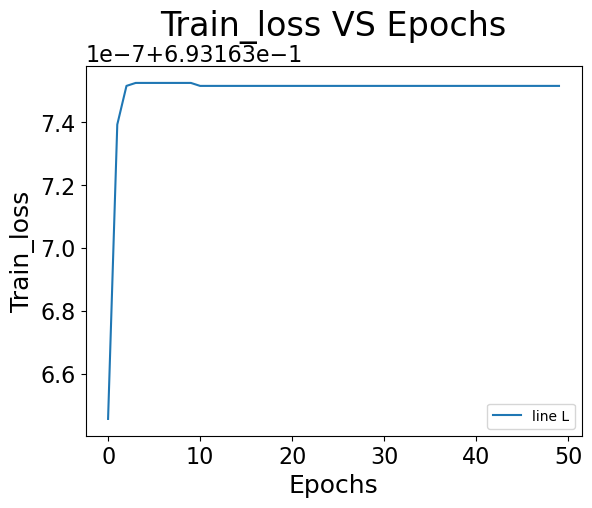

In [31]:
plot_graph(train_loss_list_5, np.arange(0, len(train_loss_list_5)), 'Train_loss', 'Train_loss VS Epochs')

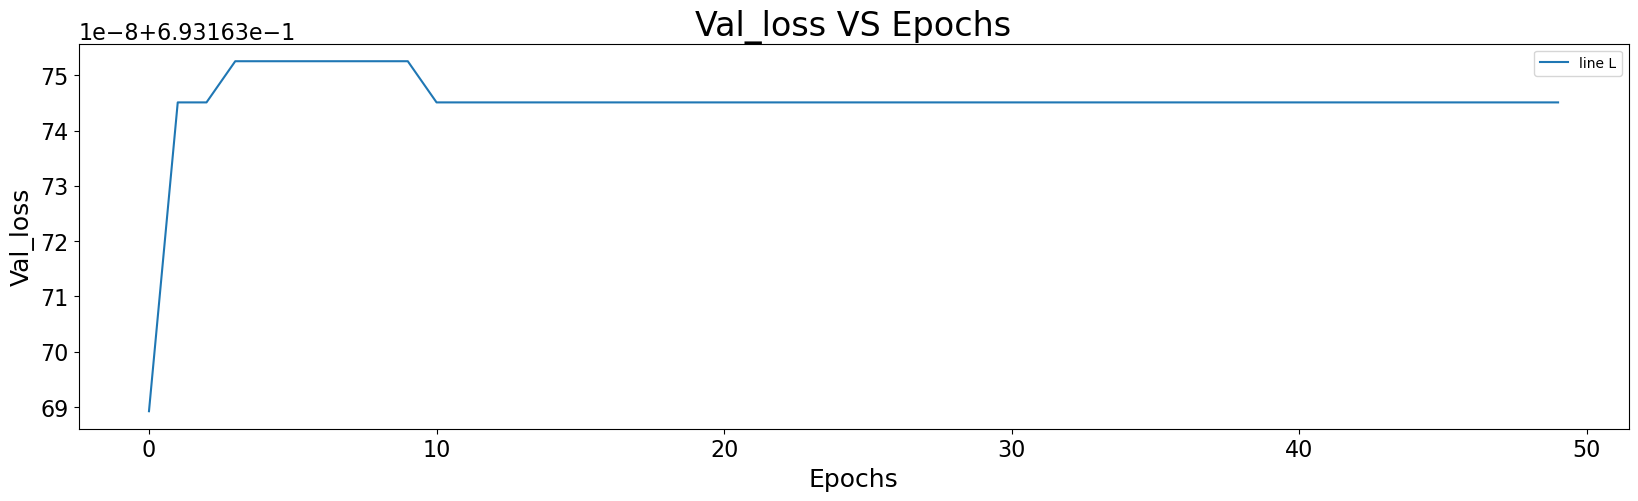

In [32]:
plot_graph(val_loss_list_5, np.arange(0, len(val_loss_list_5)), 'Val_loss', 'Val_loss VS Epochs')

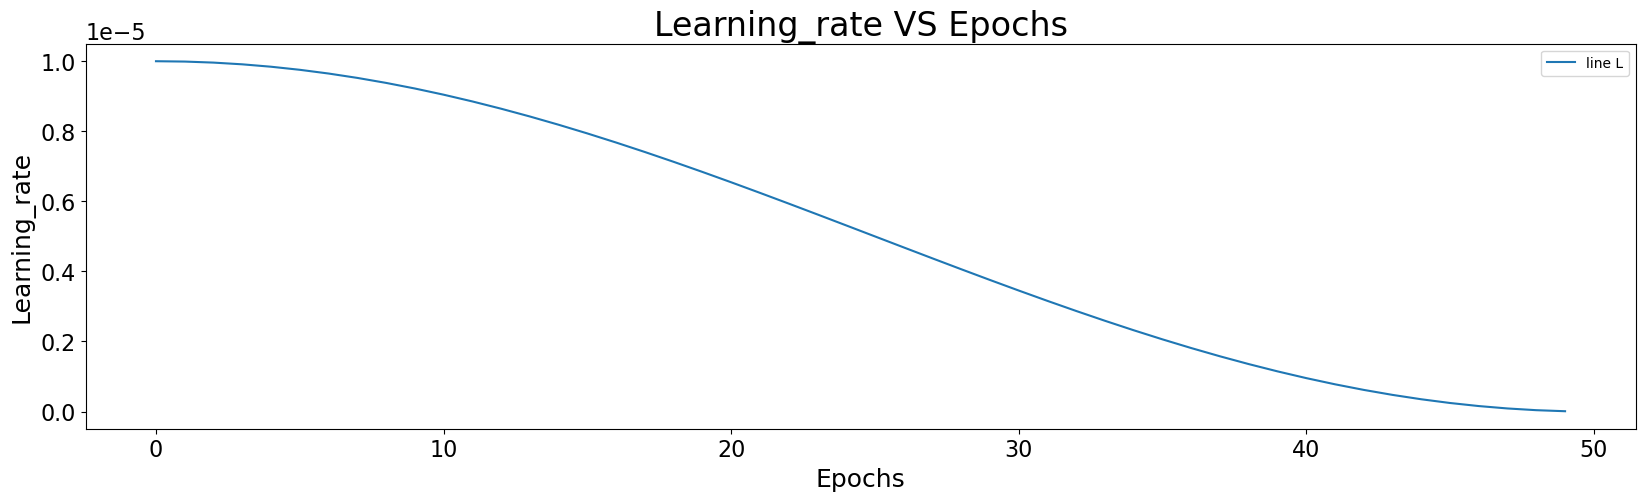

In [33]:
plot_graph(lr_list_5, np.arange(0, len(lr_list_5)), 'Learning_rate', 'Learning_rate VS Epochs')

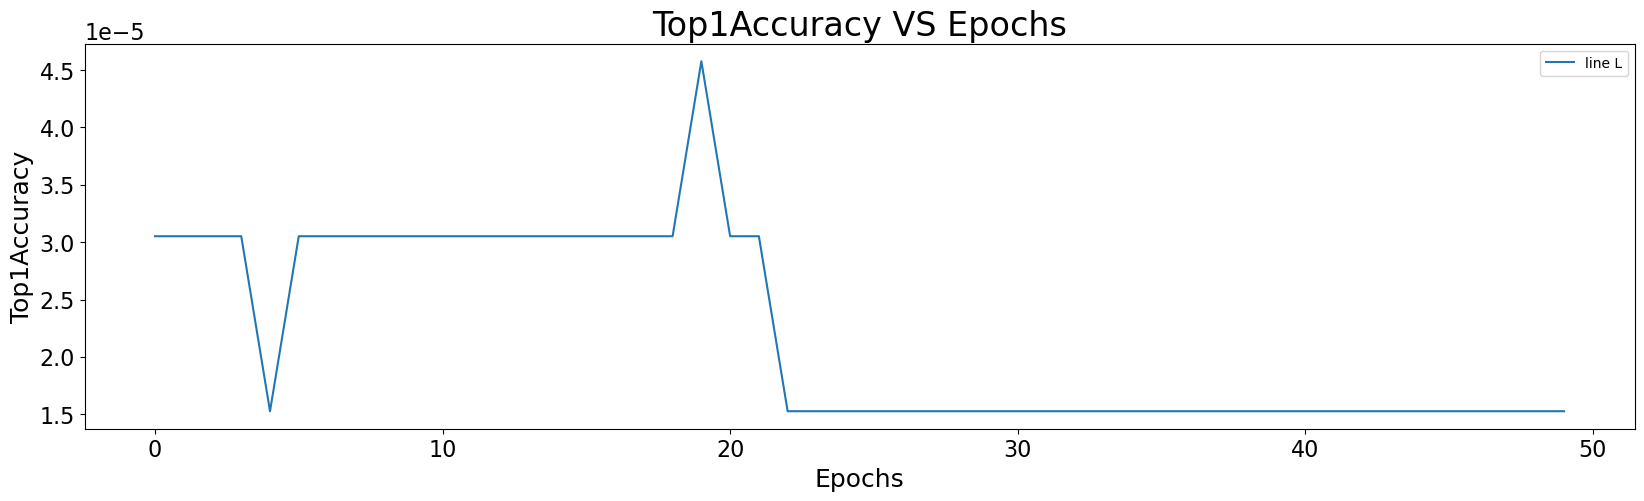

In [34]:
plot_graph(acc1_list_5, np.arange(0, len(acc1_list_5)), 'Top1Accuracy', 'Top1Accuracy VS Epochs')

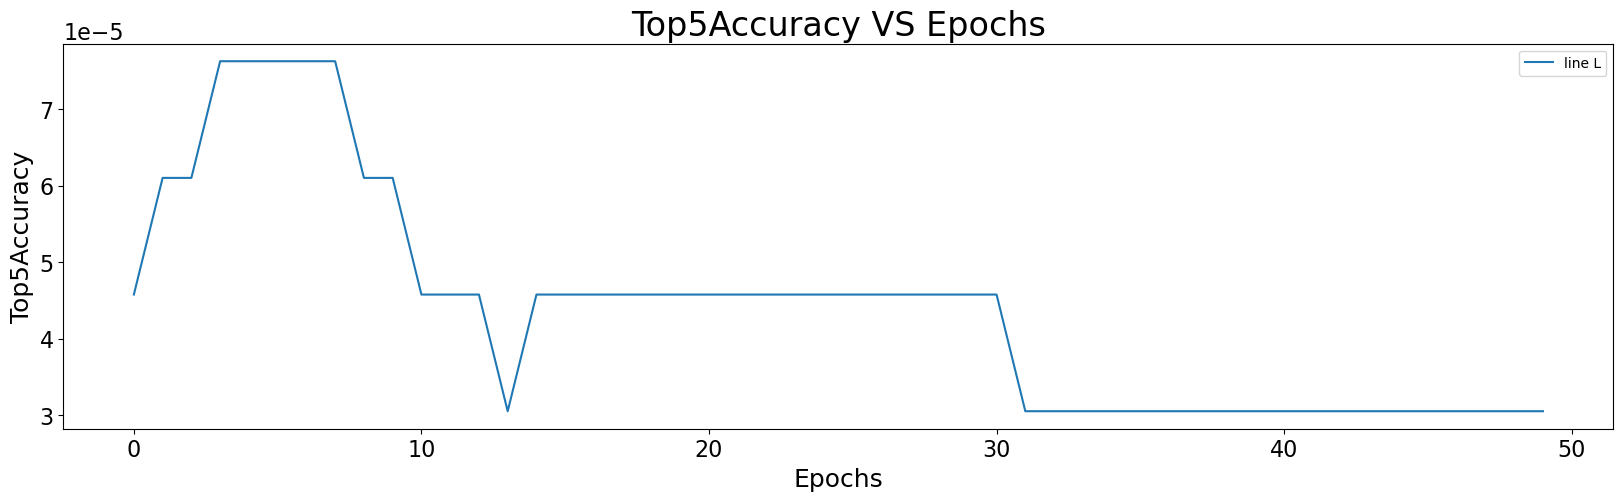

In [35]:
plot_graph(acc5_list_5, np.arange(0, len(acc5_list_5)), 'Top5Accuracy', 'Top5Accuracy VS Epochs')

In [36]:
# %load_ext tensorboard 
# %tensorboard --logdir model

In [37]:
# Infer
x_infer = X_val
y_infer = Y_val

seq_list = load2infer(model=LM(), model_path='./model/lm_acc5.pth',
                      inputs=x_infer, outputs=None,
                      inputs_transforms=VAL_INPUTS_TRANSFORMS,
                      outputs_transforms=None,
                      infer_batch_size=1, shuffle=False, skip=False)


['destiny##34destinyhandheldkant##zar##zar##zar1683pavel##zar##zar##zar[unused791]poegeometriccomicssantanahand##zar1683[unused791]hand##zar##zar##zarcomics[unused791]hand##zar##zar', 'destiny##34destinyhandheldkant##zar##zar##zar1683pavel##zar##zar##zar[unused791]poegeometriccomicssantanahand##zar1683[unused791]hand##zar##zar##zarcomics[unused791]hand##zar##zar', 'destiny##34destinyhandheldkant##zar##zar##zar1683pavel##zar##zar##zar[unused791]poegeometriccomicssantanahand##zar1683[unused791]hand##zar##zar##zarcomics[unused791]hand##zar##zar', 'destiny##34destinyhandheldkant##zar##zar##zar1683pavel##zar##zar##zar[unused791]poegeometriccomicssantanahand##zar1683[unused791]hand##zar##zar##zarcomics[unused791]hand##zar##zar', 'destiny##34destinyhandheldkant##zar##zar##zar1683pavel##zar##zar##zar[unused791]poegeometriccomicssantanahand##zar1683[unused791]hand##zar##zar##zarcomics[unused791]hand##zar##zar', 'destiny##34destinyhandheldkant##zar##zar##zar1683pavel##zar##zar##zar[unused791]poe

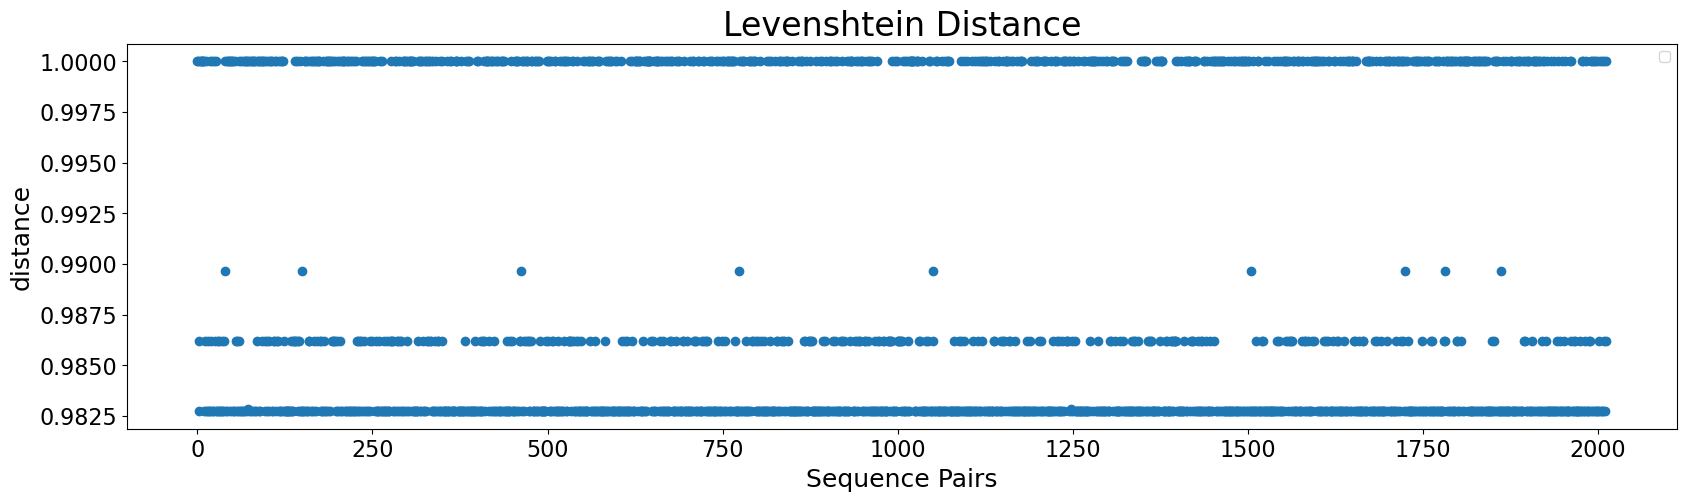

In [38]:
# LevenshteinDistance of inference
print(seq_list)
print('***************************************************')
print(Y_val_seq.tolist())
print('***************************************************')
values = distance(seq_list, Y_val_seq.tolist())
values_list = []
for i in values:
    values_list.append(i.tolist())
print(values_list)

# DataFrame
infer_df = pd.DataFrame(list(zip(seq_list, Y_val_seq.tolist(), values_list)), columns=['PredictedSequence', 'TargetSequence', 'LevenshteinDistance'])
infer_df.to_csv('./infer.csv')

# plot
plot_point(values_list, range(len(values_list)), 'distance', 'Levenshtein Distance')



In [39]:
# TFLite for submission
# t-sine paper/coding 
 